In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
is_NaN = penguins.isnull()
row_has_NaN =  is_NaN.any(axis = 1)
rows_with_NaN = penguins[row_has_NaN]
rows_with_NaN

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [8]:
NaN_index = rows_with_NaN.index
NaN_index

Int64Index([3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339], dtype='int64')

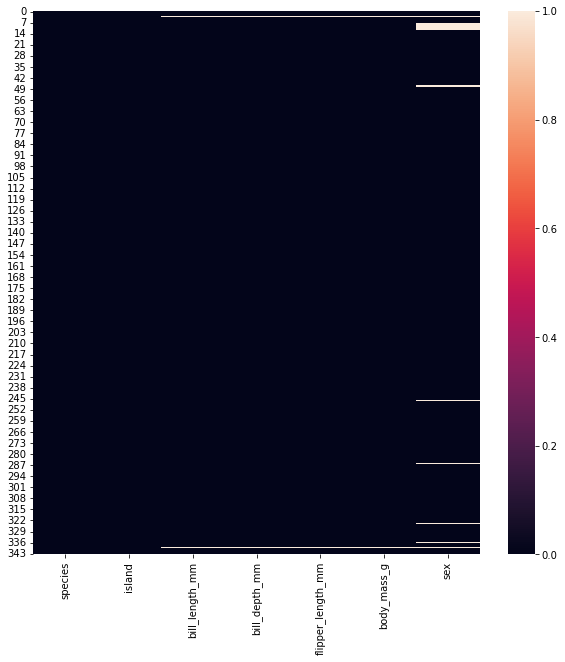

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(penguins.isnull());

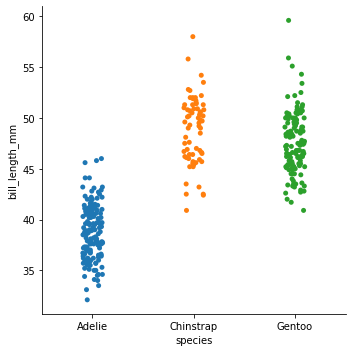

In [11]:
sns.catplot(x='species', y = "bill_length_mm", data=penguins);

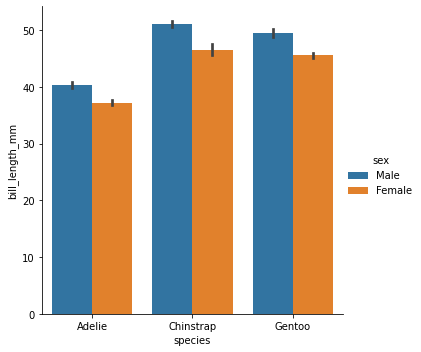

In [12]:
sns.catplot(x= 'species', y="bill_length_mm", data=penguins, kind="bar", hue="sex")

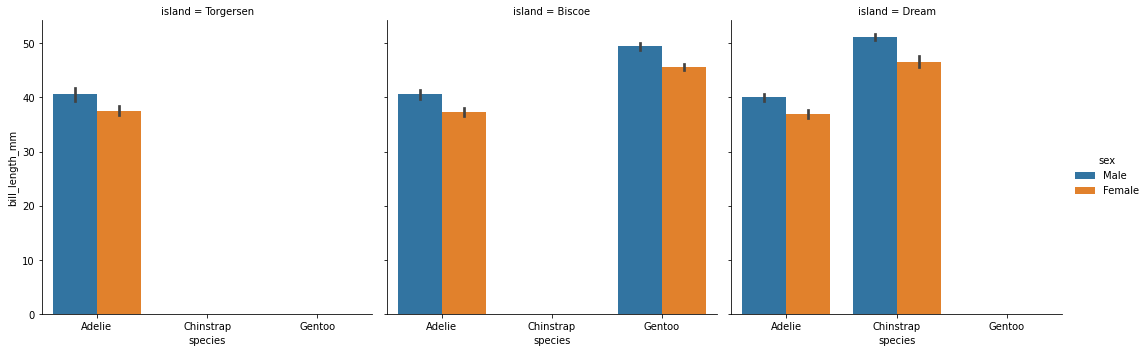

In [13]:
sns.catplot(x = 'species', y="bill_length_mm" , data=penguins, kind="bar", hue="sex", col="island")

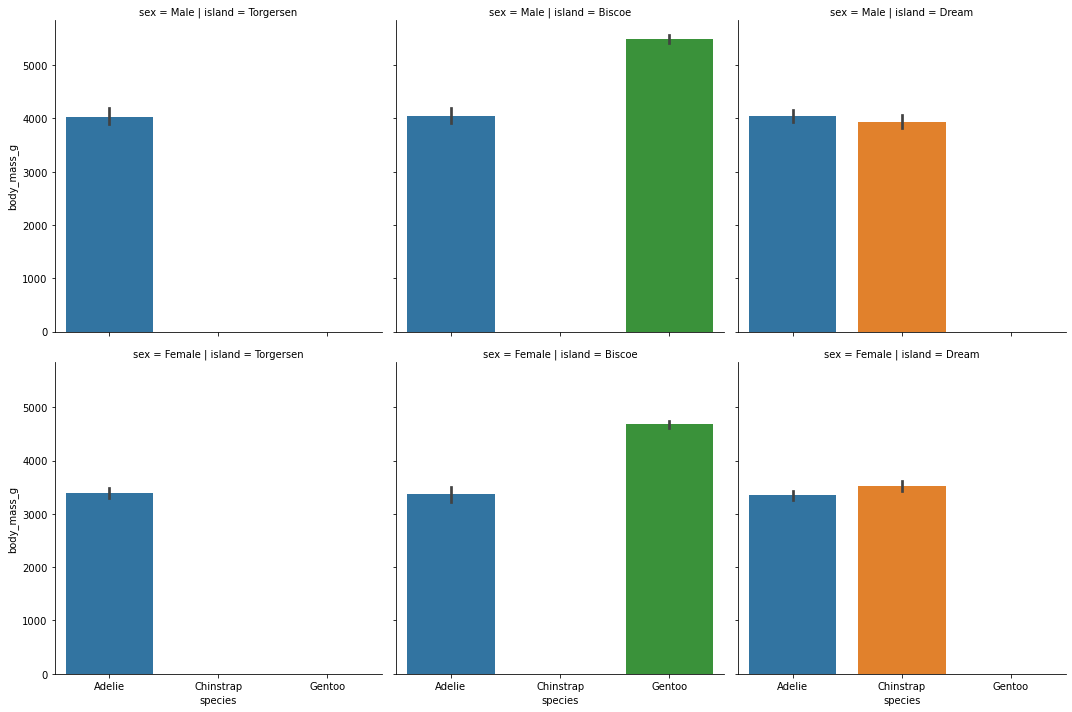

In [14]:
sns.catplot(x='species' , y="body_mass_g" , data=penguins, kind="bar", row="sex", col="island")

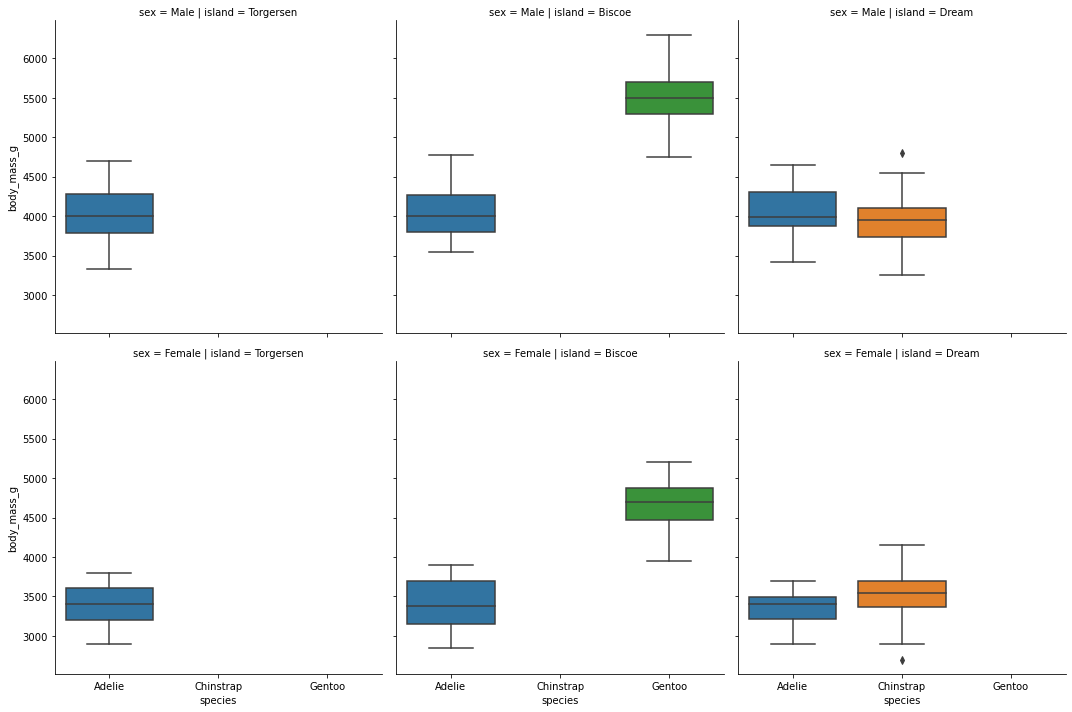

In [15]:
sns.catplot(x = 'species', y = 'body_mass_g', data= penguins, kind="box",row="sex", col="island")

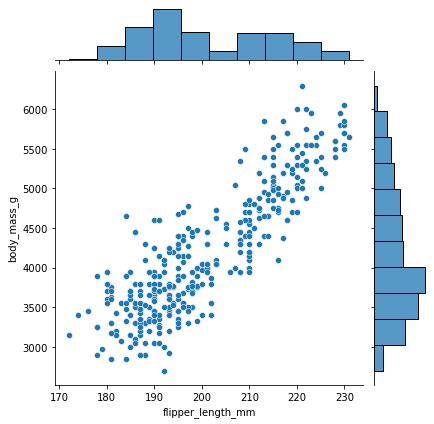

In [16]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g',data=penguins);

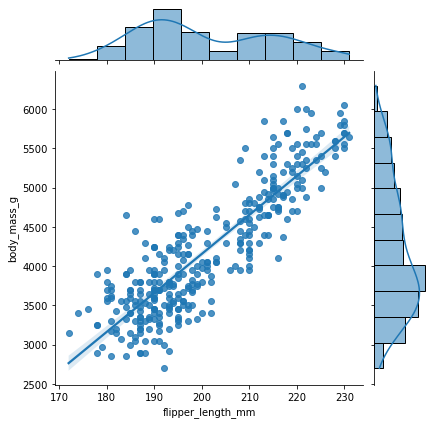

In [17]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g', data=penguins, kind="reg")

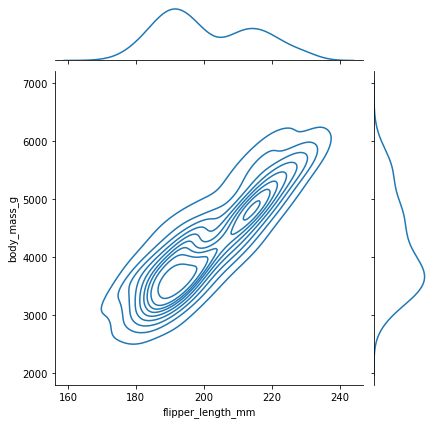

In [18]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g' , data=penguins, kind="kde")

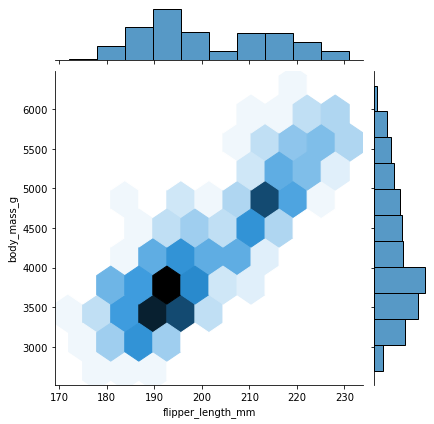

In [20]:
sns.jointplot(x='flipper_length_mm' , y='body_mass_g', data=penguins, kind="hex")

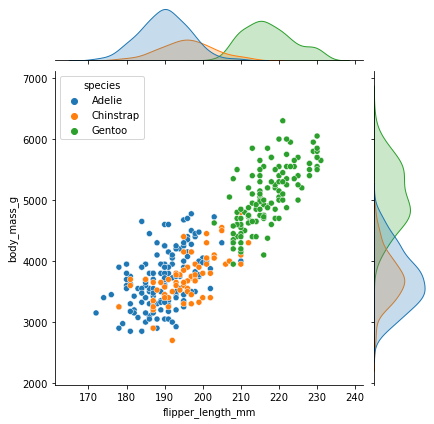

In [21]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue="species");

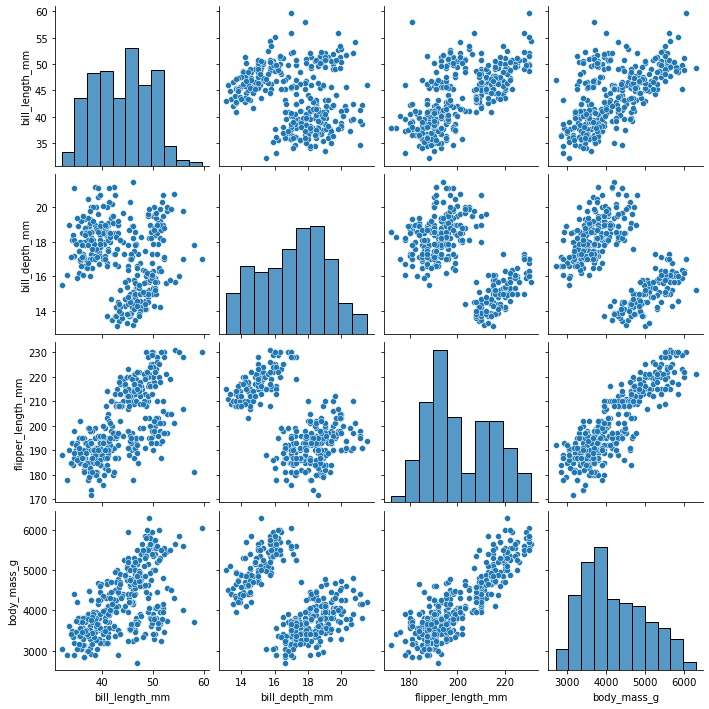

In [22]:
sns.pairplot(penguins);

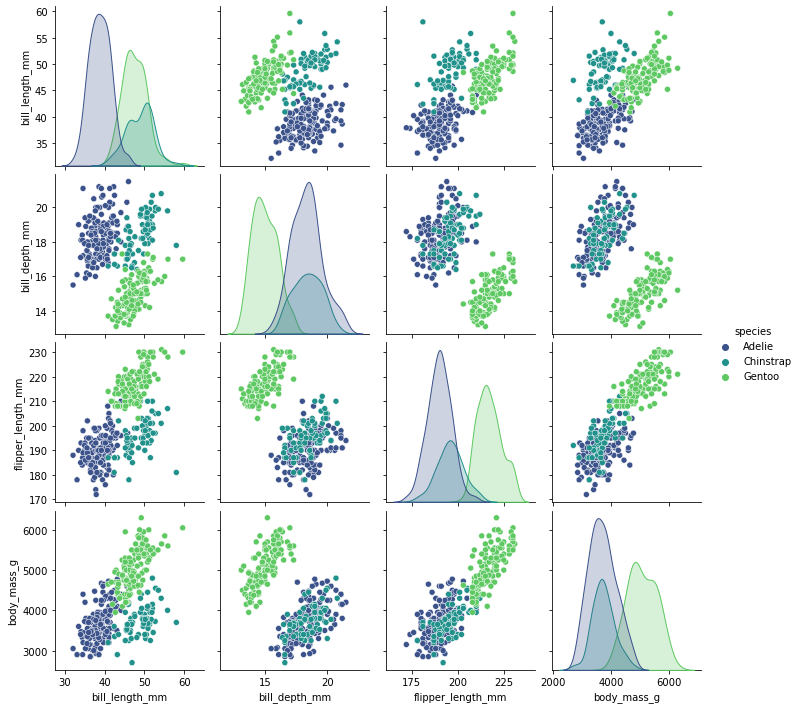

In [25]:
sns.pairplot(penguins, hue='species', palette='viridis');

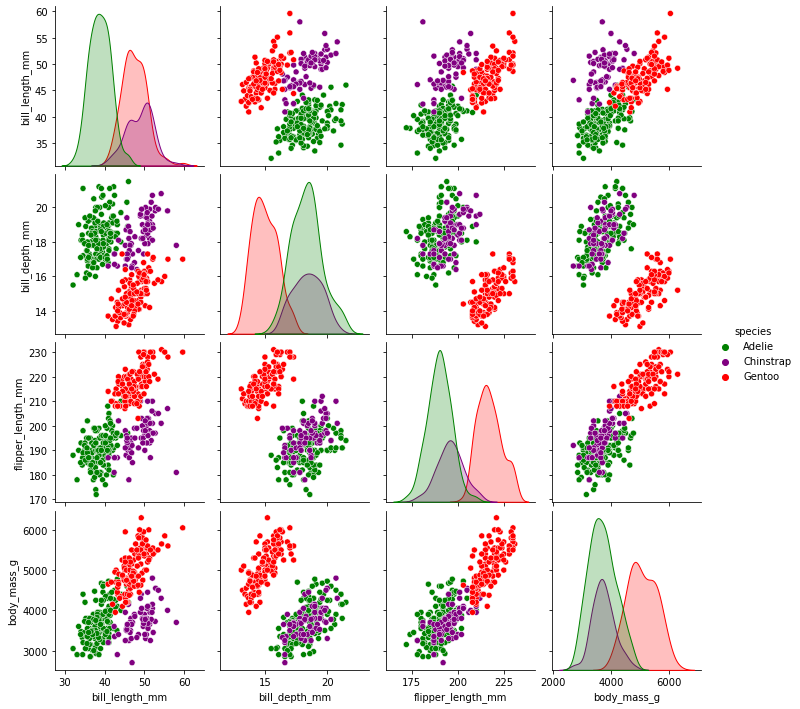

In [26]:
sns.set_palette(['green', 'purple', 'red'])
sns.pairplot(penguins,hue='species')

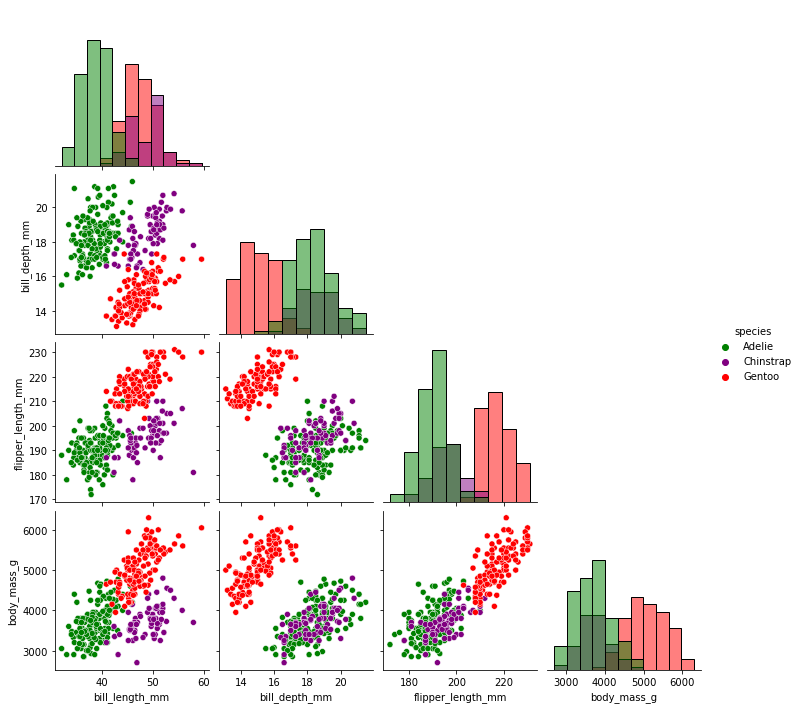

In [27]:
sns.set_palette(['green' , 'purple', 'red'])
sns.pairplot(penguins, hue='species' , corner=True,diag_kind='hist');

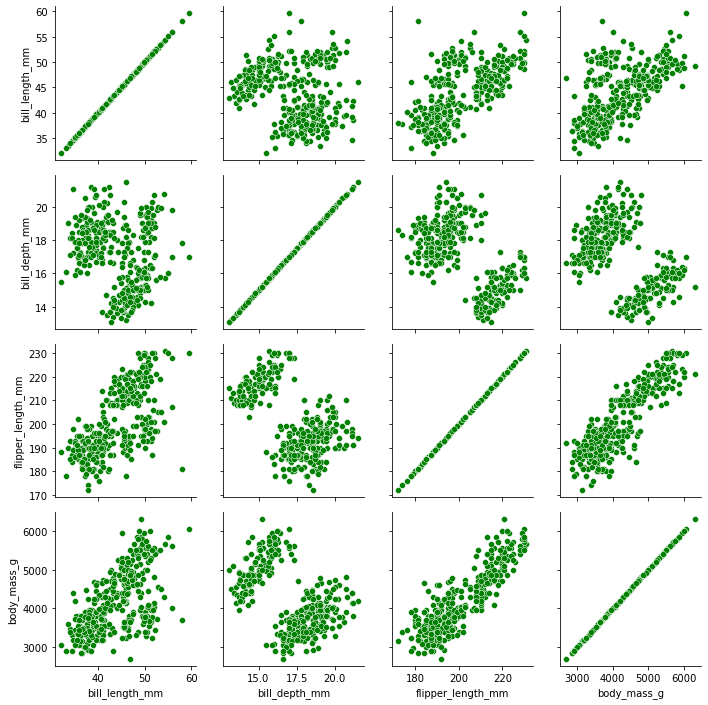

In [28]:
g= sns.PairGrid(penguins)
g.map(sns.scatterplot);

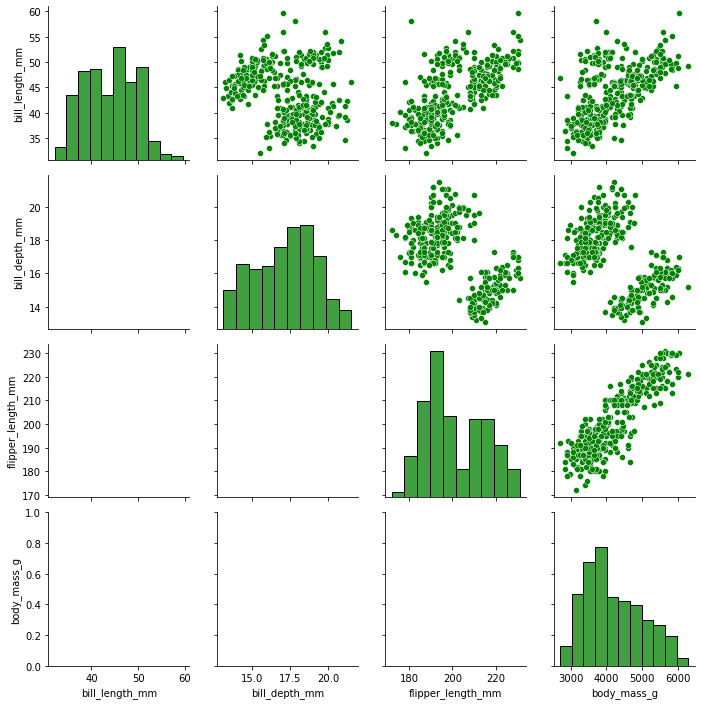

In [29]:
g = sns.PairGrid(penguins)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot);


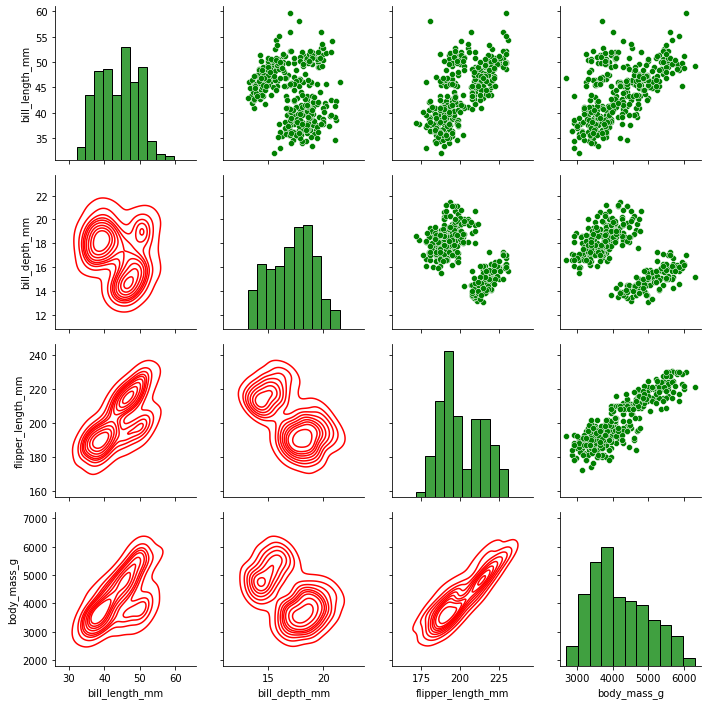

In [30]:
g = sns.PairGrid(penguins)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot, colors="red")

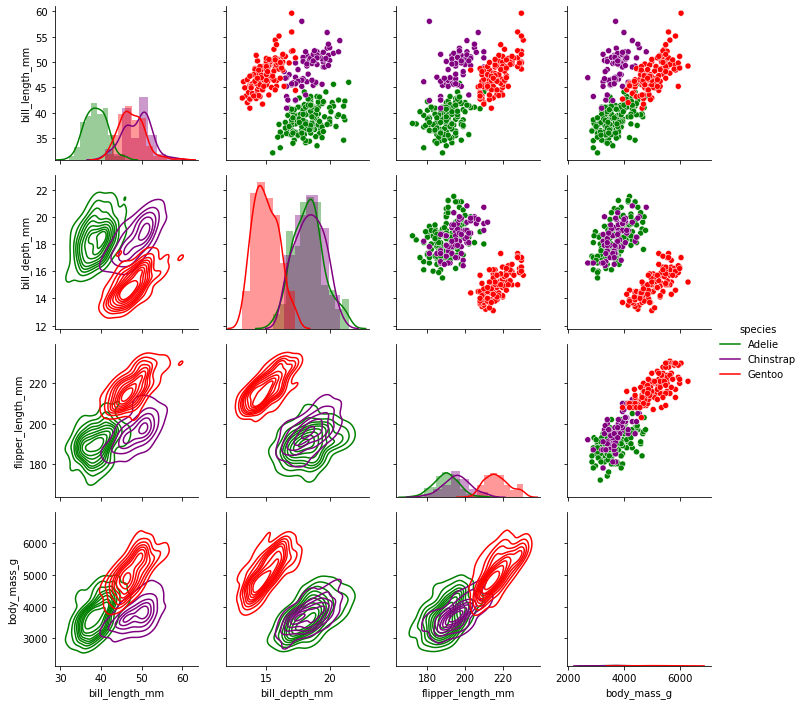

In [31]:
sns.set_palette(['green', 'purple', 'red'])
g =  sns.PairGrid(penguins, hue= "species")
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.distplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()

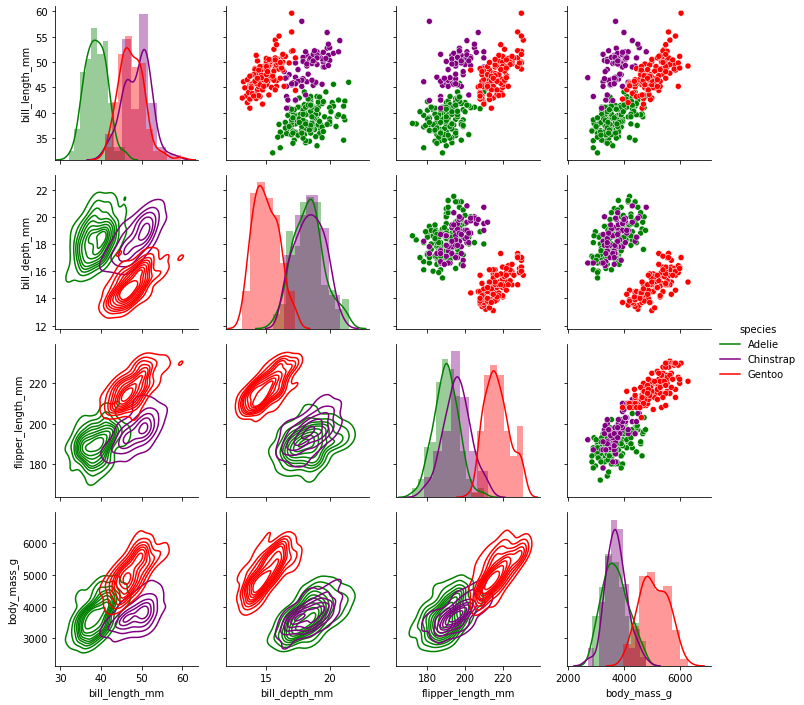

In [34]:
sns.set_palette(['green', 'purple', 'red'])
g = sns.PairGrid(penguins, hue="species", diag_sharey=False)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.distplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()

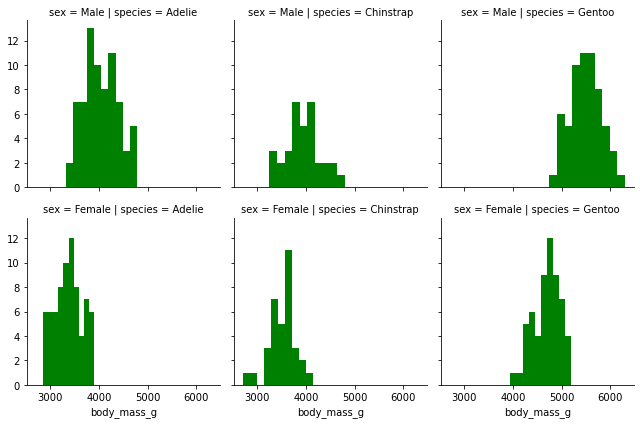

In [38]:
g = sns.FacetGrid(data = penguins, col="species", row = "sex")
g = g.map(plt.hist, "body_mass_g")

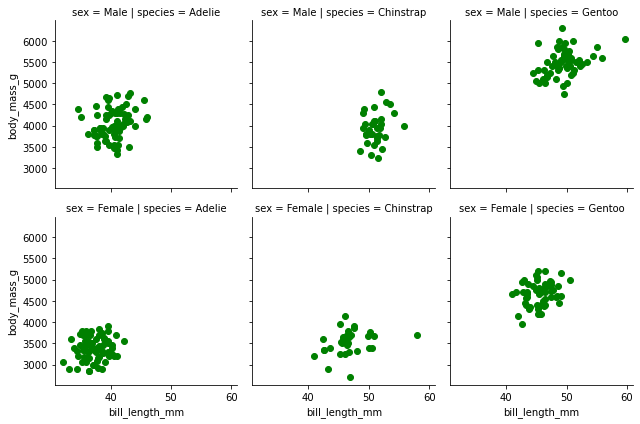

In [39]:
g = sns.FacetGrid(data=penguins, col="species", row="sex")
g = g.map(plt.scatter, "bill_length_mm" , "body_mass_g")

In [40]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:>

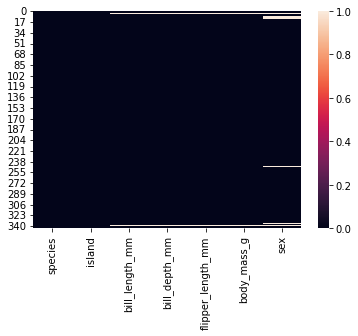

In [42]:
sns.heatmap(data=penguins.isnull())

<AxesSubplot:>

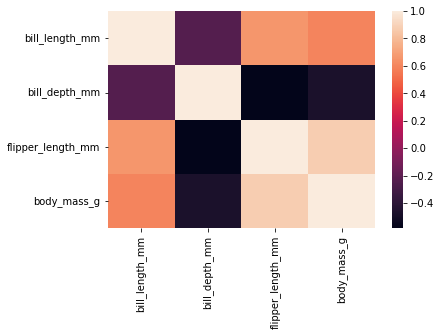

In [43]:
sns.heatmap(data= penguins.corr())

<AxesSubplot:>

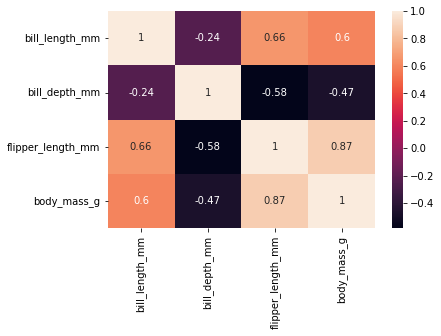

In [44]:
sns.heatmap(data = penguins.corr() , annot=True)

<AxesSubplot:>

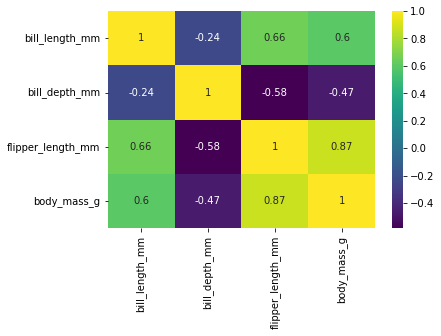

In [45]:
sns.heatmap(data=penguins.corr(), cmap='viridis', annot=True)

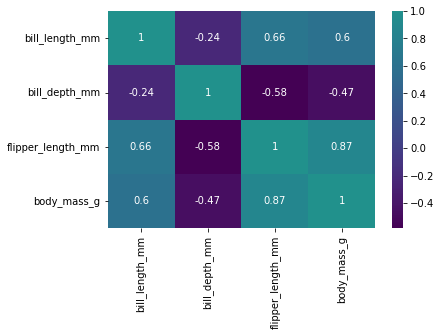

In [46]:
sns.heatmap(data=penguins.corr(), cmap='viridis', annot=True, center=1);

<AxesSubplot:>

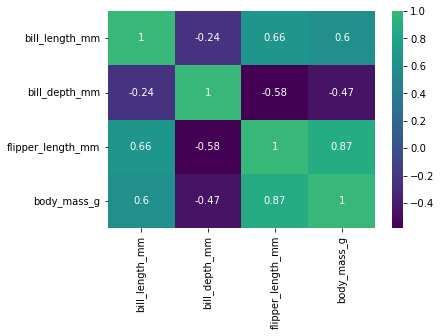

In [47]:
sns.heatmap(data=penguins.corr(), cmap='viridis', annot=True, center=0.6)

<AxesSubplot:>

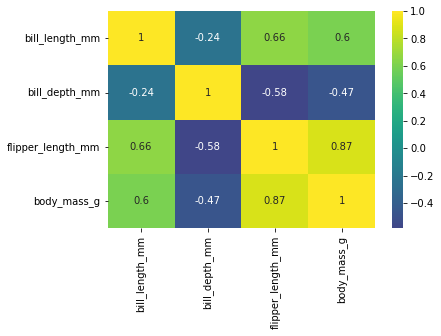

In [48]:
sns.heatmap(data=penguins.corr(), cmap='viridis', annot=True, center=0)

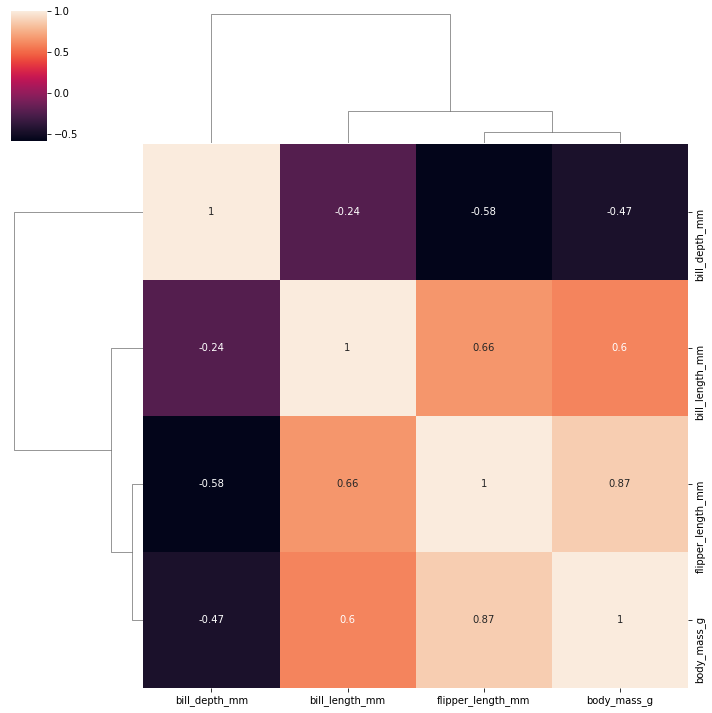

In [49]:
sns.clustermap(penguins.corr(),annot=True)

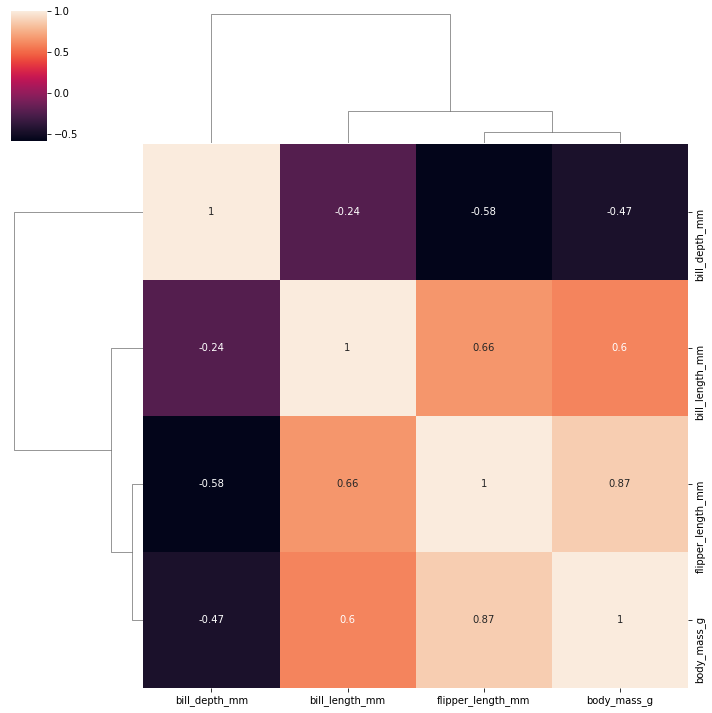

In [52]:
sns.clustermap(penguins.corr(), annot=True, metric="euclidean");

In [53]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [55]:
species = penguins.pop("species")
species.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

In [56]:
sex = penguins.pop("sex")
sex.head()

0      Male
1    Female
2    Female
3       NaN
4    Female
Name: sex, dtype: object

In [57]:
island = penguins.pop("island")
island.head()

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [58]:
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


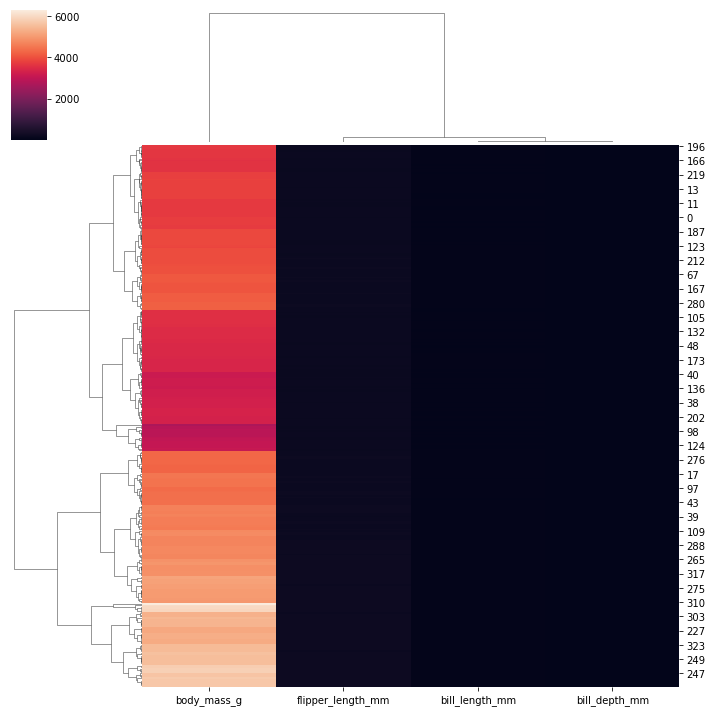

In [59]:
penguins.dropna(inplace=True)
g = sns.clustermap(penguins)